Imports



In [40]:
# Install kagglehub package
%pip install kagglehub --quiet

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd 
import kagglehub as kh
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Download latest version
path = kh.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\plui0\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [43]:
def load_data(path):
    normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)
    return normal, abnormal

# Call the function
normal, abnormal = load_data(path)


In [44]:
head = normal.head()
print("First 5 rows of normal data:\n", head)

First 5 rows of normal data:
         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.

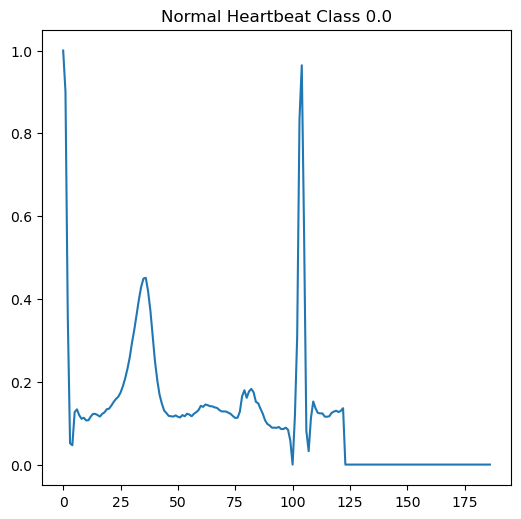

In [45]:
classes = normal.iloc[:, -1].unique()
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    plt.subplot(2, 3, i + 1)
    sample = normal[normal.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(sample.values)
    plt.title(f"Normal Heartbeat Class {cls}")
plt.tight_layout()
plt.show()


In [46]:
head = abnormal.head()
print("First 5 rows of abnormal data:\n", head)

First 5 rows of abnormal data:
         0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  

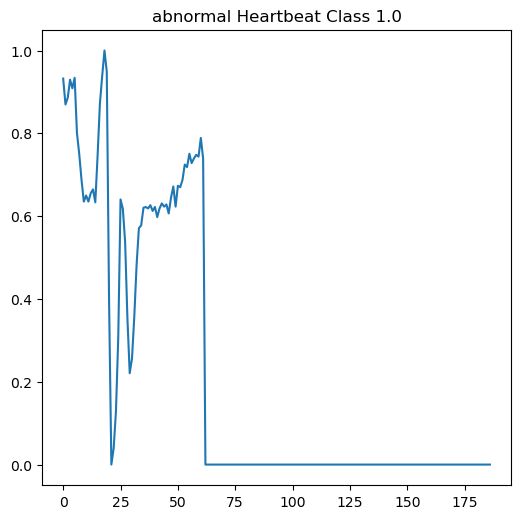

In [47]:
classes = abnormal.iloc[:, -1].unique()
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    plt.subplot(2, 3, i + 1)
    sample = abnormal[abnormal.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(sample.values)
    plt.title(f"abnormal Heartbeat Class {cls}")
plt.tight_layout()
plt.show()

In [48]:
def load_data(path):
    # Load CSVs
    normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)

    # Combine them
    data = pd.concat([normal, abnormal], ignore_index=True)

    # Split features and labels (last column is label)
    X = data.iloc[:, :-1]  # all columns except last
    y = data.iloc[:, -1]   # last column is label

    return X, y

In [49]:
X, y = load_data(path)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Label distribution:\n", y.value_counts())

Features shape: (14552, 187)
Labels shape: (14552,)
Label distribution:
 187
1.0    10506
0.0     4046
Name: count, dtype: int64


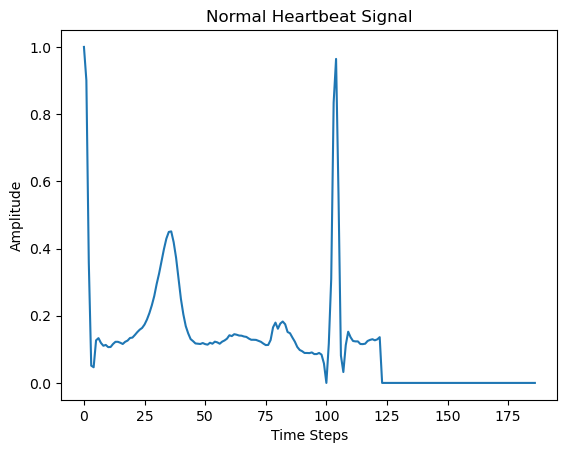

In [50]:
# Plot a normal heartbeat
plt.plot(X.iloc[0])
plt.title("Normal Heartbeat Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.show()

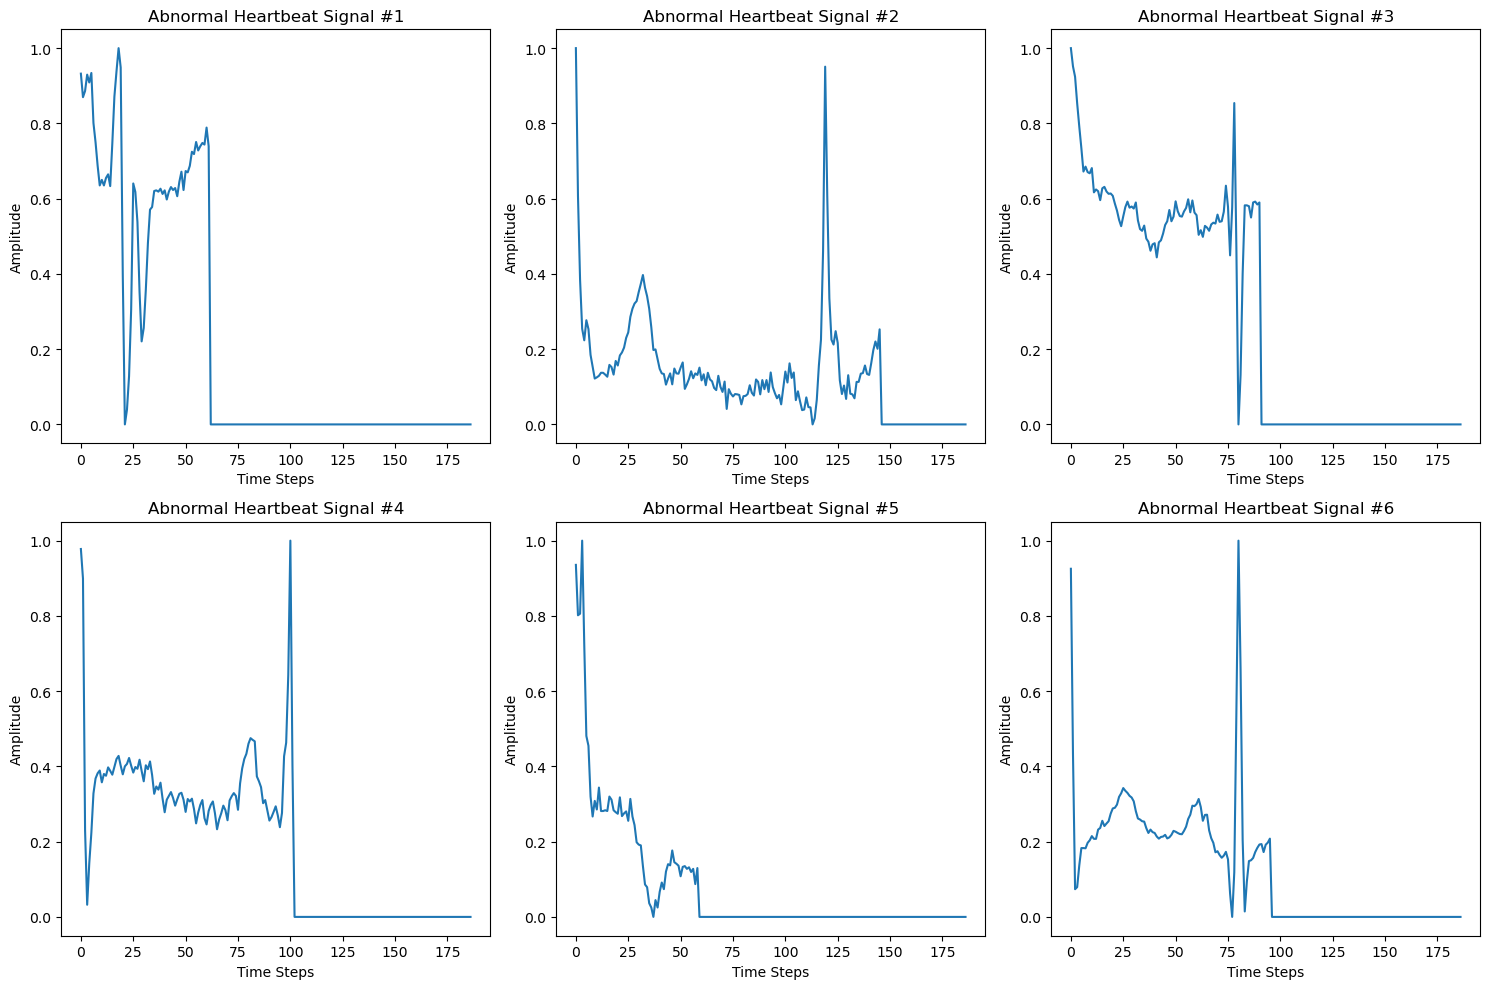

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.flatten()
for i in range(len(normal), len(normal) + 6):
    plt.subplot(2, 3, i - len(normal) + 1)
    plt.plot(X.iloc[i])
    plt.title(f"Abnormal Heartbeat Signal #{i - len(normal) + 1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    
plt.tight_layout()
plt.show()


Explained variance ratio for all components: [3.26834841e-01 1.60227797e-01 6.56161868e-02 4.73865473e-02
 3.51610873e-02 2.69601210e-02 2.18927756e-02 1.79984524e-02
 1.57103208e-02 1.44172951e-02 1.38904401e-02 1.34681500e-02
 1.23523677e-02 1.12583356e-02 1.02936516e-02 9.79603638e-03
 9.44379638e-03 8.56428243e-03 8.19746649e-03 7.92984538e-03
 7.39735388e-03 7.17331166e-03 6.79370590e-03 6.58165748e-03
 6.32024735e-03 6.00689816e-03 5.69335491e-03 5.43963939e-03
 5.25531139e-03 4.95966670e-03 4.75583521e-03 4.57942864e-03
 4.24332523e-03 4.14529713e-03 3.95940052e-03 3.84054237e-03
 3.80804874e-03 3.65562745e-03 3.47481008e-03 3.17342401e-03
 2.88261750e-03 2.57661698e-03 2.32709553e-03 2.19403111e-03
 2.12413022e-03 2.03587233e-03 1.97303333e-03 1.88899121e-03
 1.78378828e-03 1.66913267e-03 1.53304623e-03 1.51562531e-03
 1.42182823e-03 1.34513546e-03 1.27727867e-03 1.24286771e-03
 1.20869886e-03 1.11735080e-03 1.06765445e-03 9.93586279e-04
 9.10620870e-04 8.61820080e-04 8.4722083

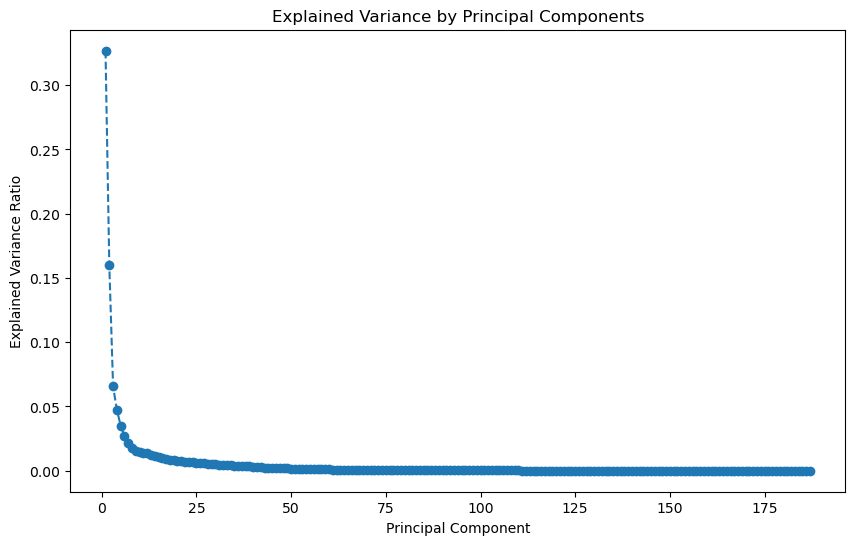

Correlation Matrix:
          0         1         2         3         4         5         6    \
0    1.000000 -0.144666 -0.177616 -0.152790 -0.096287 -0.065342 -0.055155   
1   -0.144666  1.000000  0.751248  0.500707  0.305988  0.212290  0.181973   
2   -0.177616  0.751248  1.000000  0.838487  0.622316  0.472374  0.384922   
3   -0.152790  0.500707  0.838487  1.000000  0.872682  0.688740  0.561711   
4   -0.096287  0.305988  0.622316  0.872682  1.000000  0.894447  0.763733   
..        ...       ...       ...       ...       ...       ...       ...   
182  0.001748 -0.005430  0.004487  0.013047  0.006255 -0.001191 -0.005762   
183  0.000728 -0.013417 -0.002900  0.013421  0.011019  0.002726 -0.002896   
184 -0.005034 -0.004618 -0.008378 -0.004828 -0.007734 -0.012645 -0.018201   
185 -0.005019 -0.004243 -0.008054 -0.004500 -0.007586 -0.012545 -0.018111   
186       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9    ...       177       

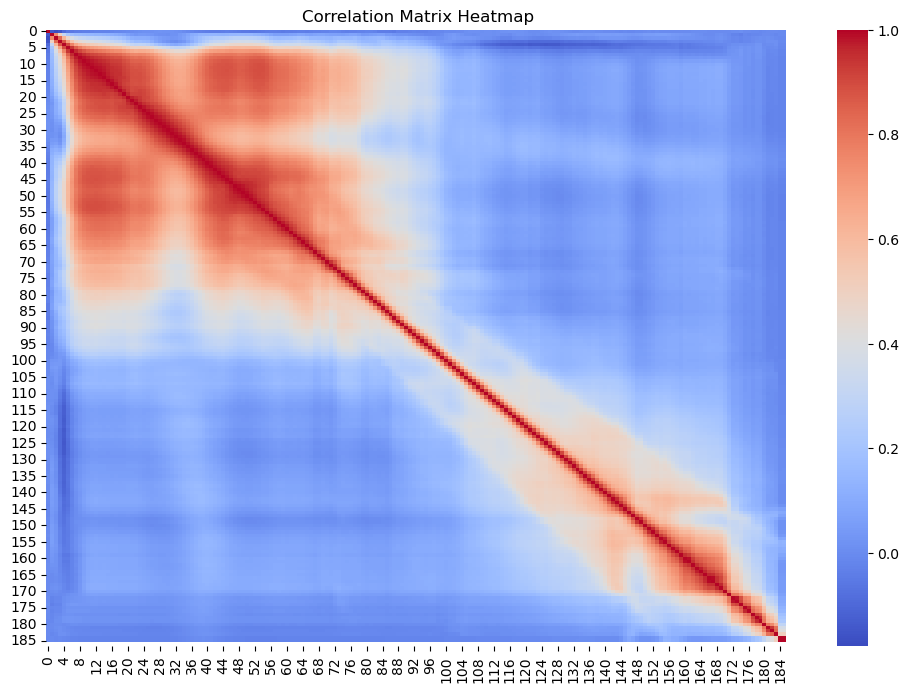

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # Retain all components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for all components
print("Explained variance ratio for all components:", pca.explained_variance_ratio_)

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled).corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()